# 🧠 Executive Summary

This project focuses on the prediction of heart disease using machine learning techniques. Using a cleaned and preprocessed version of the Cleveland heart disease dataset, the study explores data-driven strategies for diagnosis support.

Key highlights:

- Missing values were imputed using Random Forest classifiers (for categorical) and regressors (for continuous features).
- High-missing and low-importance columns like `ca` and `thal` were dropped.
- Outliers were detected and handled using IQR and Z-score methods.
- Feature classification was done into categorical, boolean, and numeric types for targeted processing.
- 14 machine learning models were evaluated, with Ridge, Logistic Regression, and Random Forest yielding the best results in terms of F1 score and recall.
- The best model achieved an F1-score of ~0.63, showing potential for real-world application with further tuning.

This project demonstrates a robust data preprocessing pipeline and lays the foundation for future enhancements in heart disease risk classification using machine learning.


# Heart Disease Prediction

## Meta-Data (About Dataset)

### Context
This is a **multivariate** dataset, which means it involves multiple statistical variables. It contains **14 primary attributes** commonly used in heart disease prediction. Although the original database includes **76 attributes**, most studies focus on this subset of 14.

The **Cleveland dataset** is the most widely used by machine learning researchers. 

**Main objectives:**
- Predict whether a patient has heart disease based on the given attributes.
- Perform exploratory analysis to gain insights that can help understand the problem better.

---

## Content

### Column Descriptions

| Column      | Description |
|-------------|-------------|
| `id`        | Unique ID for each patient |
| `age`       | Age of the patient (in years) |
| `origin`    | Place of study |
| `sex`       | Gender (Male/Female) |
| `cp`        | Chest pain type: `typical angina`, `atypical angina`, `non-anginal pain`, `asymptomatic` |
| `trestbps`  | Resting blood pressure (in mm Hg on hospital admission) |
| `chol`      | Serum cholesterol in mg/dl |
| `fbs`       | Fasting blood sugar > 120 mg/dl (True/False) |
| `restecg`   | Resting electrocardiographic results: `normal`, `ST-T abnormality`, `left ventricular hypertrophy` |
| `thalach`   | Maximum heart rate achieved |
| `exang`     | Exercise-induced angina (True/False) |
| `oldpeak`   | ST depression induced by exercise relative to rest |
| `slope`     | Slope of the peak exercise ST segment |
| `ca`        | Number of major vessels (0–3) colored by fluoroscopy |
| `thal`      | Thalassemia: `normal`, `fixed defect`, `reversible defect` |
| `num`       | Diagnosis of heart disease (0 = no disease, 1–4 = presence of disease) |

---

## Acknowledgements

**Creators:**
- Hungarian Institute of Cardiology, Budapest: *Andras Janosi, M.D.*
- University Hospital, Zurich, Switzerland: *William Steinbrunn, M.D.*
- University Hospital, Basel, Switzerland: *Matthias Pfisterer, M.D.*
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: *Robert Detrano, M.D.*

---

## Relevant Papers

- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). *International application of a new probability algorithm for the diagnosis of coronary artery disease.* *American Journal of Cardiology*, **64**, 304–310.
- David W. Aha & Dennis Kibler. *Instance-based prediction of heart-disease presence with the Cleveland database.*
- Gennari, J.H., Langley, P., & Fisher, D. (1989). *Models of incremental concept formation.* *Artificial Intelligence*, **40**, 11–61.

---

> **Citation Request:**  
> The authors request that any publications using this dataset cite the principal investigators listed in the **Acknowledgements** section.


# Importing Libraries

In [2]:
# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

# load the data from csv file placed locally in our pc

In [3]:
df = pd.read_csv('C:/Users/awan/heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# checking the data type of each column

In [156]:
#checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 920 rows and 16 columns.


# Checking Total number of missing values in Descending Order

In [158]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

# Calculate percentage of missing values column-wise

In [159]:
# Calculate percentage of missing values column-wise
missing_percentage = df.isnull().mean() * 100

# Sort in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Print result
print("Missing Values Percentage (Descending Order):")
print(missing_percentage)

Missing Values Percentage (Descending Order):
ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64


| Column            | Action              | Reason                                       |
|-------------------|---------------------|----------------------------------------------|
| `chol`            | ✅ Keep & impute     | High importance, low missing                 |
| `thalch`          | ✅ Keep & impute     | High importance, low missing                 |
| `oldpeak`         | ✅ Keep & impute     | High importance, low missing                 |
| `age`             | ✅ Keep              | Essential feature, no missing                |
| `trestbps`        | ✅ Keep & impute     | Moderate importance, low missing             |
| `exang`           | ✅ Keep & impute     | Some importance, low missing                 |
| `ca`              | ⚠️ Drop or Impute    | Medium importance, **very high missing (66%)** |
| `thal_normal`     | ❌ Drop              | Low importance, high missing (53%)          |
| `cp_asymptomatic` | ✅ Optional (Keep)   | No missing, may help in interpretation       |
| `dataset_Switzerland` | ✅ Optional (Keep) | No missing, low importance                   |


# 🧹 Dropping High-Missing & Low-Importance Columns (ca and thal)

In [160]:
# Drop columns 'ca' and 'thal' from the dataframe
df.drop(['ca', 'thal'], axis=1, inplace=True)

# Checking missing values columns after dropping ca and thal

In [161]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']

## Feature Classification

The dataset features are categorized into the following types:

- **Categorical Columns**: Variables with discrete categories such as chest pain type, slope, and sex.
- **Boolean Columns**: Binary features like fasting blood sugar and exercise-induced angina.
- **Numeric Columns**: Continuous numerical values including age, cholesterol level, and resting blood pressure.


In [162]:
categorical_cols = ['slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

## 🔍🧠 Imputing missing values using Random Forest — 🧾 Classifier for categorical 🆚 Regressor for continuous features.


In [163]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


In [164]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [165]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass


Missing Values trestbps : 6.41%
MAE = 13.455202312138729 

RMSE = 17.677849550776372 

R2 = 0.024254259426641944 

Missing Values chol : 3.26%
MAE = 45.45904494382023 

RMSE = 64.08634576039852 

R2 = 0.6746508603335266 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.706127167630058 

RMSE = 21.630662752173496 

R2 = 0.3196553625889982 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5688779069767441 

RMSE = 0.803033583386468 

R2 = 0.38563656200899976 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy



In [166]:
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

# All missing values are imputed

## Dealing with Outliers

## 📊🔢 Visualizing the distribution of all numeric features using histograms with KDE.


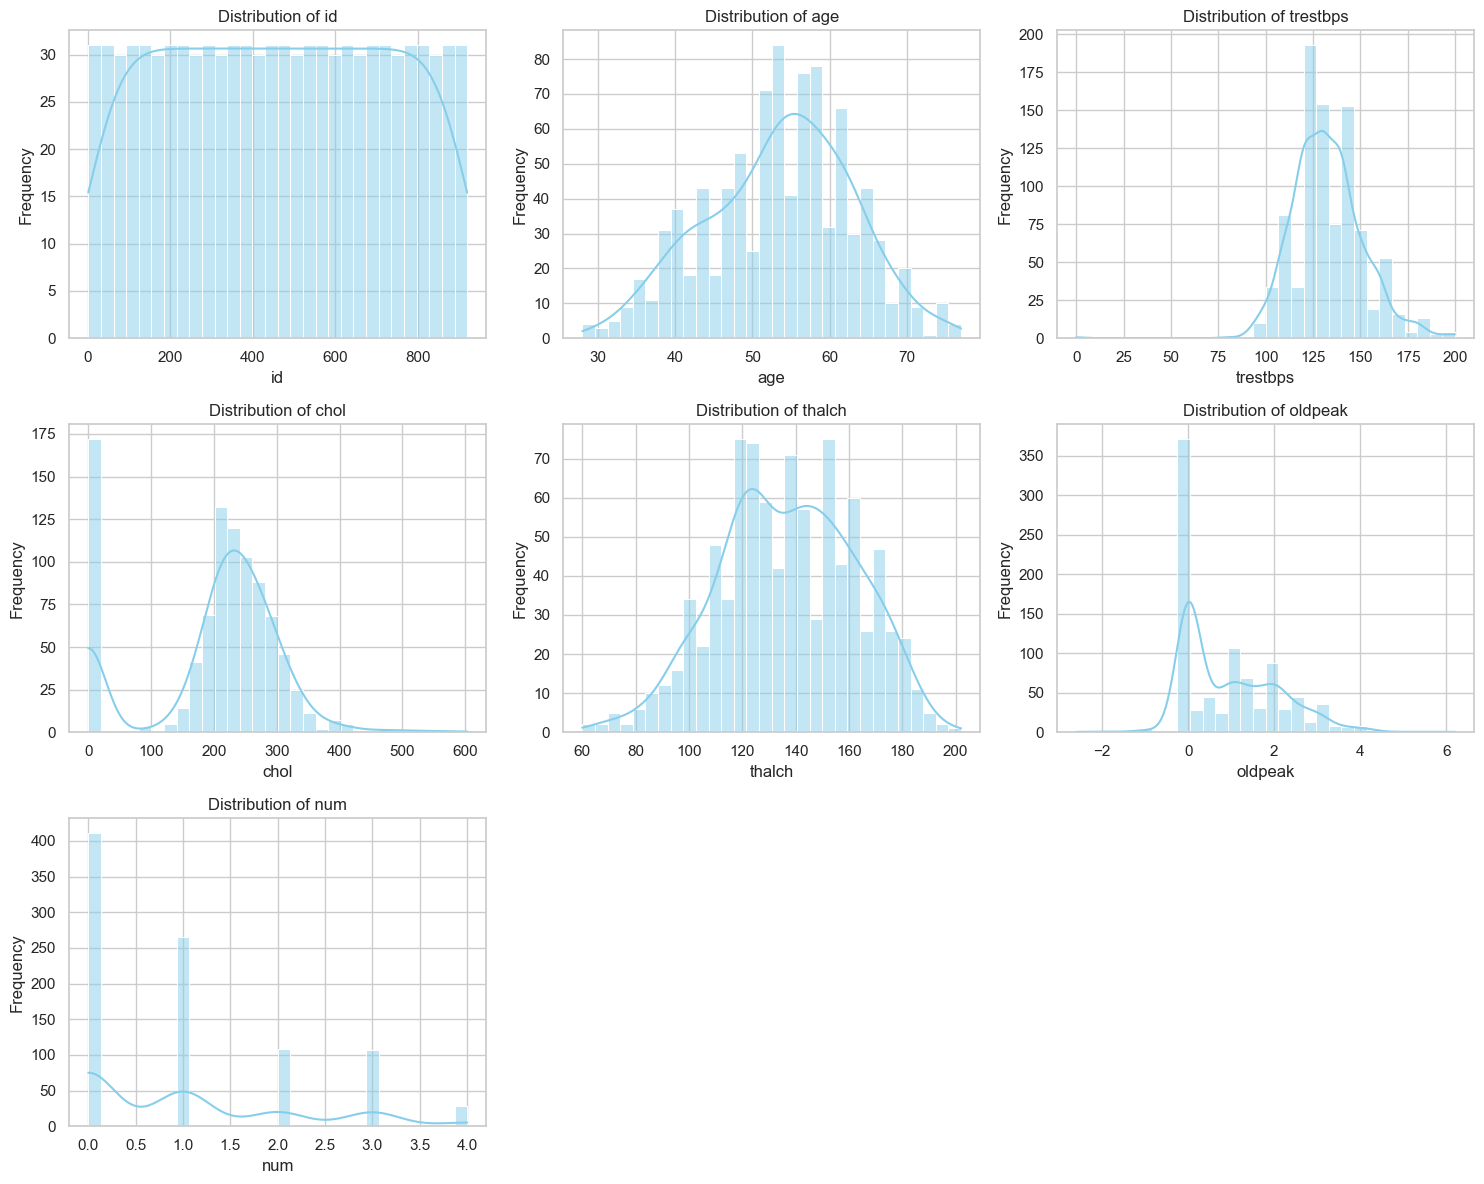

In [167]:
import math

# === Select only numeric columns ===
numeric_cols = df.select_dtypes(include='number').columns

# === Plot settings ===
num_cols = len(numeric_cols)
cols = 3  # Number of columns in subplot grid
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols * 5, rows * 4))
sns.set(style="whitegrid")

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 🧹❌ Removing rows where cholesterol (`chol`) value is 0, as it's likely an invalid or missing entry.


In [168]:
df = df[df['chol'] != 0].reset_index(drop=True)


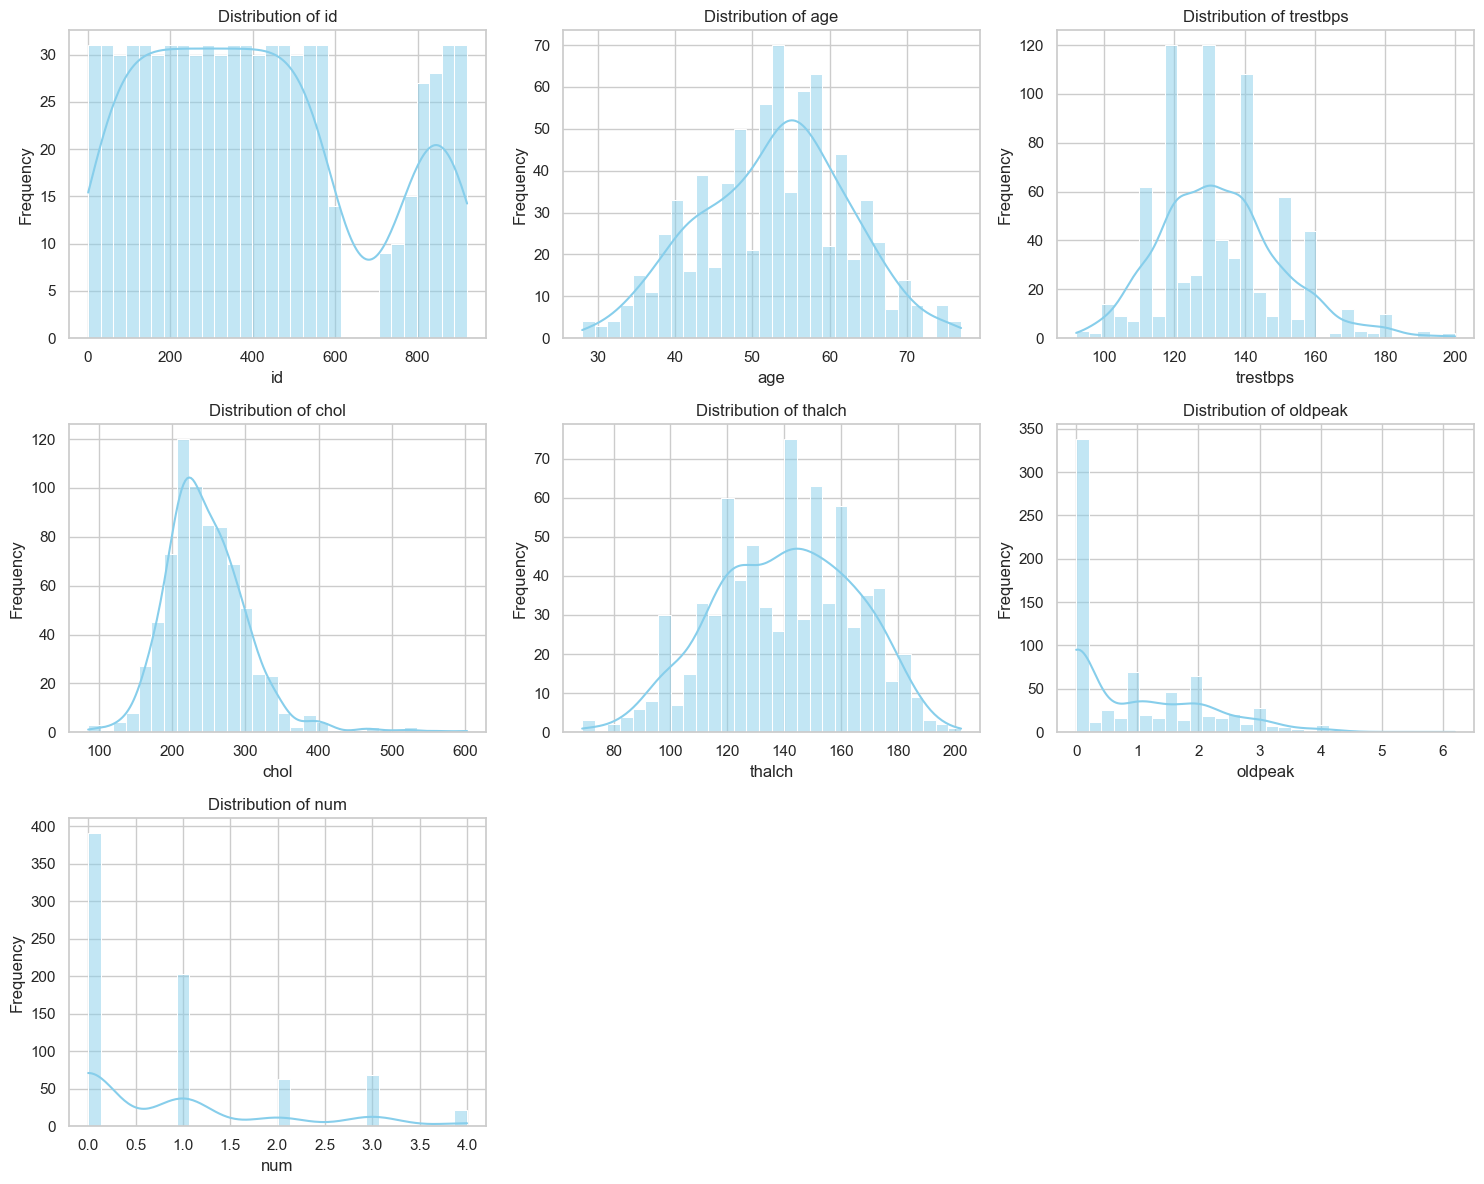

In [169]:
import math

# === Select only numeric columns ===
numeric_cols = df.select_dtypes(include='number').columns

# === Plot settings ===
num_cols = len(numeric_cols)
cols = 3  # Number of columns in subplot grid
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols * 5, rows * 4))
sns.set(style="whitegrid")

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 📈✅ Since `age` and `thalach` are normally distributed, we'll use the **Z-score** method for outlier detection, while `trestbps`, `chol`, and `oldpeak` are left-skewed, so we'll apply the **interpercentile range (IPR)** method. 🧮📊


## 📦📉 Visualizing numeric features with **boxplots** to detect potential outliers across variables.


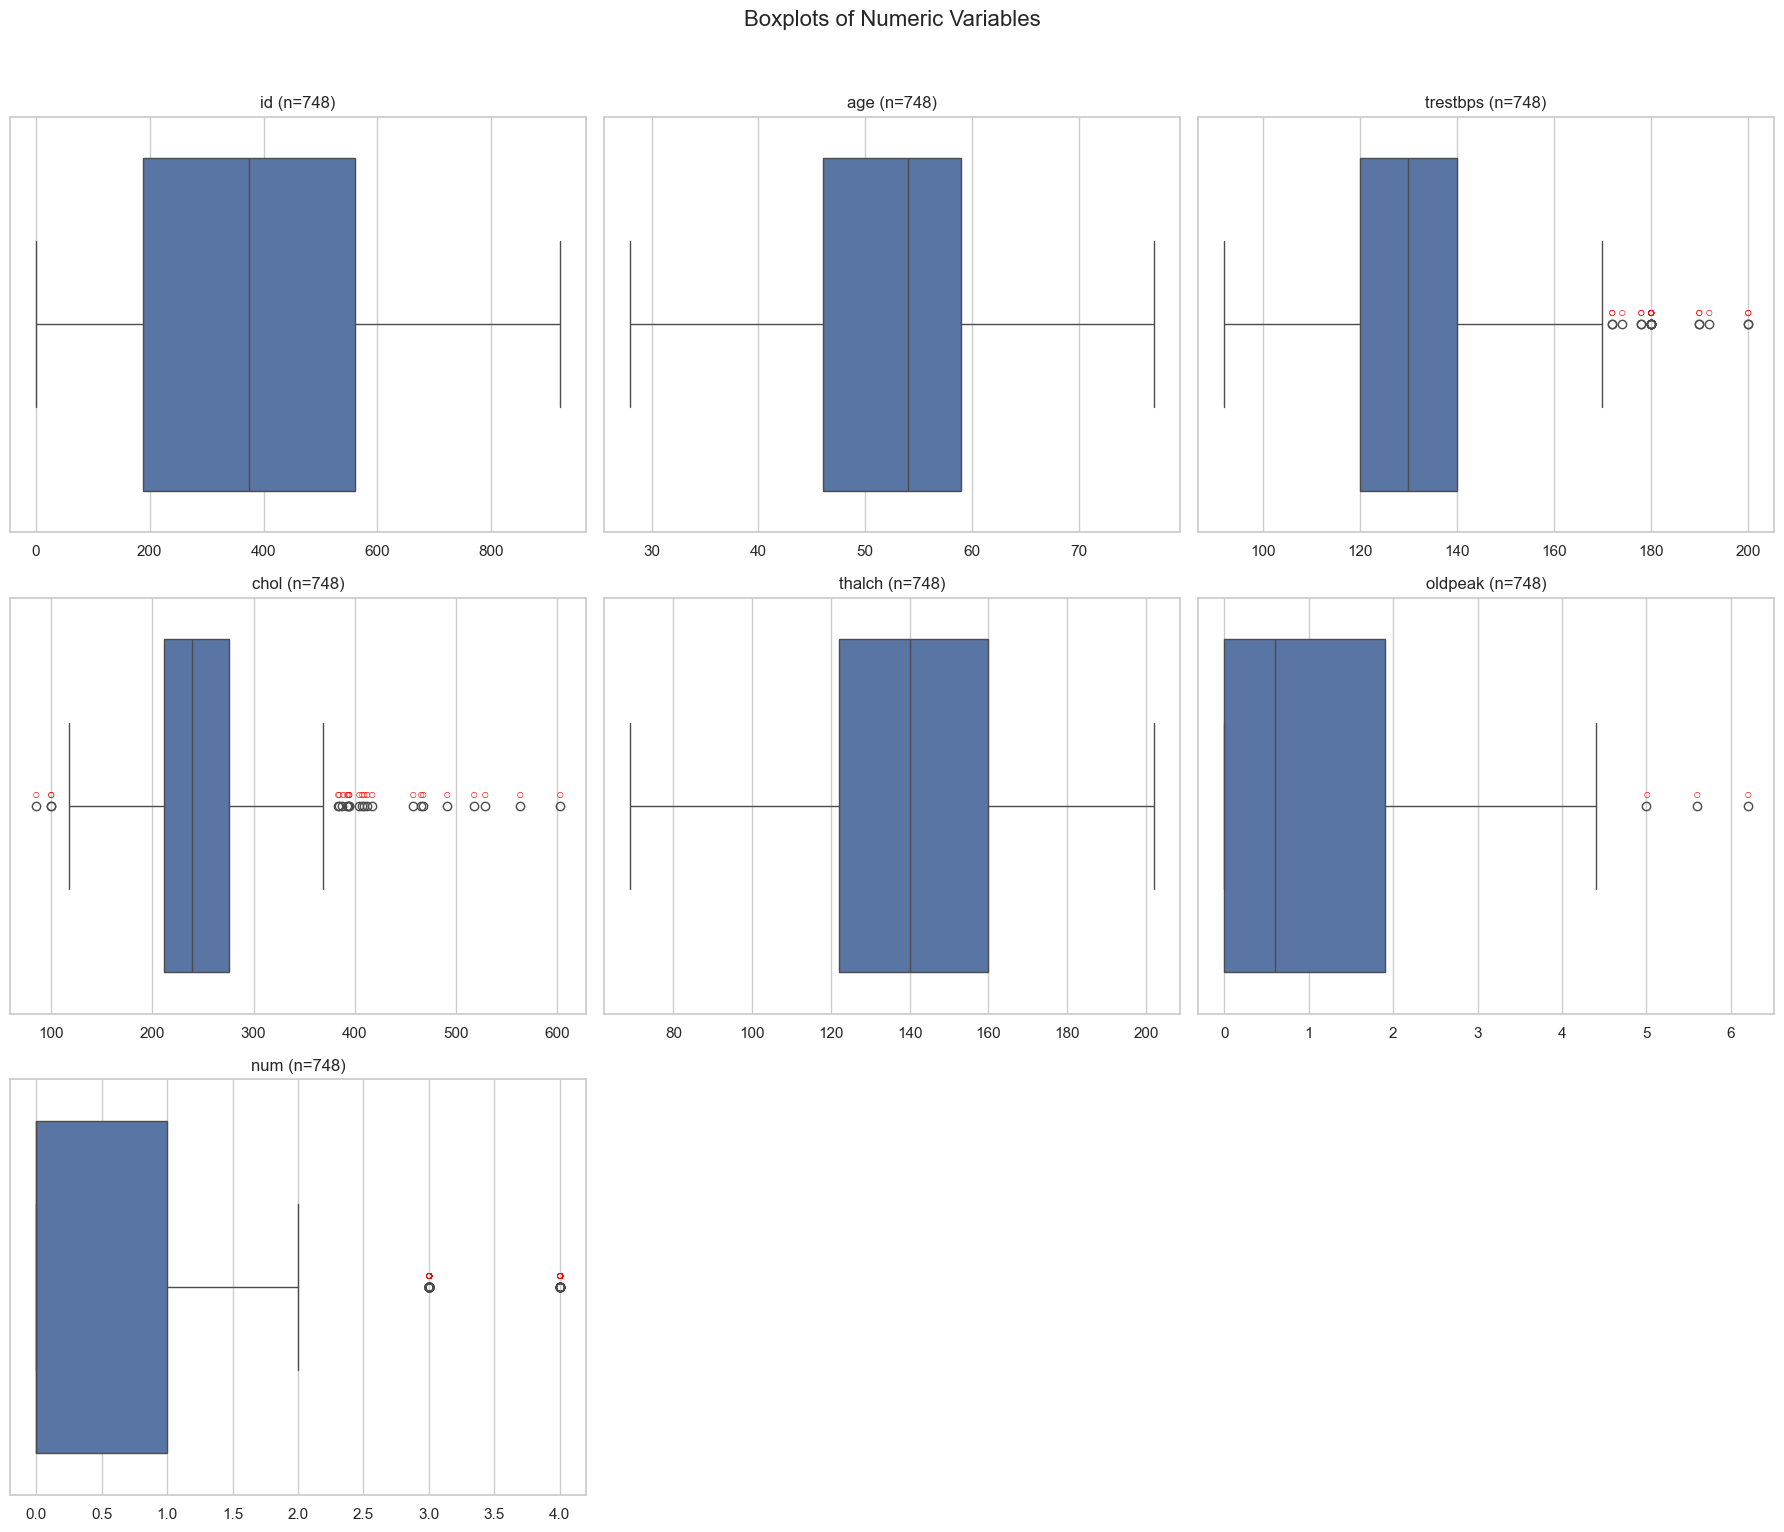

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
# 2. Calculate grid dimensions (3 plots per row)
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Round up division

# 3. Create the plot
plt.figure(figsize=(18, 5*n_rows))
plt.suptitle('Boxplots of Numeric Variables', y=1.02, fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create boxplot
    box = sns.boxplot(x=df[col])
    
    # Optional: Highlight outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    
    if not outliers.empty:
        
        for _, row in outliers.iterrows():
            box.annotate('○',
                        xy=(row[col], 0),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center',
                        color='red',
                        fontsize=10)
    
    plt.title(f'{col} (n={len(df[col].dropna())})')
    plt.xlabel('')

plt.tight_layout()
plt.show()

## ✅ No Outliers in `age` and `thalach`
All Z-scores for `age` and `thalach` fall within the -3 to +3 range, indicating that these normally distributed columns have **no outliers**.

## ⚠️ Outliers Detected in `trestbps`, `chol`, and `oldpeak`
These left-skewed columns have values that lie **outside the upper and lower percentiles**, suggesting the presence of **outliers** that need to be addressed.
.


## 🧮 Detecting Outliers Using the IQR Method
We're identifying outliers in `trestbps`, `chol`, and `oldpeak` using the **Interquartile Range (IQR)** technique.  
📌 Outliers are defined as values falling below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR**.  
All detected outliers are collected into a separate DataFrame for further inspection. ✅


In [171]:
# Columns to check for outliers
columns_to_check = ['trestbps', 'chol', 'oldpeak']

# Create an empty DataFrame to store all outliers
all_outliers = pd.DataFrame()

# Loop through each column and find outliers using IQR
for col in columns_to_check:
    if col in df.columns:
        # Calculate IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        # Get outliers
        lower_outliers = df[df[col] < lower_limit]
        upper_outliers = df[df[col] > upper_limit]

        # Combine both and add to all_outliers DataFrame
        col_outliers = pd.concat([lower_outliers, upper_outliers])
        all_outliers = pd.concat([all_outliers, col_outliers])

# Remove duplicate rows
all_outliers = all_outliers.drop_duplicates()

# Drop 'age_zscore' and 'thalch_zscore' columns if present
all_outliers = all_outliers.drop(columns=[col for col in ['age_zscore', 'thalch_zscore'] if col in all_outliers.columns])

# ✅ Show the cleaned DataFrame with 'num' column (if present)
all_outliers


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
14,15,52,Male,Cleveland,non-anginal,172.00,199.00,True,normal,162.00,False,0.500,upsloping,0
83,84,68,Male,Cleveland,non-anginal,180.00,274.00,True,lv hypertrophy,150.00,True,1.600,flat,3
126,127,56,Female,Cleveland,asymptomatic,200.00,288.00,True,lv hypertrophy,133.00,True,4.000,downsloping,3
172,173,59,Female,Cleveland,asymptomatic,174.00,249.00,False,normal,143.00,True,0.000,flat,1
183,184,59,Male,Cleveland,typical angina,178.00,270.00,False,lv hypertrophy,145.00,False,4.200,downsloping,0
188,189,54,Male,Cleveland,atypical angina,192.00,283.00,False,lv hypertrophy,195.00,False,0.000,upsloping,1
201,202,64,Female,Cleveland,asymptomatic,180.00,325.00,False,normal,154.00,True,0.000,upsloping,0
213,214,66,Female,Cleveland,asymptomatic,178.00,228.00,True,normal,165.00,True,1.000,flat,3
231,232,55,Female,Cleveland,asymptomatic,180.00,327.00,False,st-t abnormality,117.00,True,3.400,flat,2
338,339,39,Male,Hungary,atypical angina,190.00,241.00,False,normal,106.00,False,0.000,flat,0


In [172]:
print("Total number of outlier rows:", len(all_outliers))


Total number of outlier rows: 45


# Drop outlier rows from df based on IQR outliers detected in all_outliers

In [173]:
# Drop outlier rows from df based on IQR outliers detected in all_outliers
df = df.drop(index=all_outliers.index)

# Optional: confirm the change
print("Updated df shape after removing outliers:", df.shape)


Updated df shape after removing outliers: (703, 14)


# Remove 'age_zscore' and 'thalch_zscore'

In [174]:
# Remove 'age_zscore' and 'thalch_zscore'
df = df.drop(columns=[col for col in ['age_zscore', 'thalch_zscore'] if col in df.columns])

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'num']


## 🔍 Checking Z-Score Ranges for Numeric Columns
We calculate the **Z-scores** for each numeric column to assess the spread and detect potential outliers.  
✅ If all Z-scores lie within the -3 to +3 range, the column is considered free of outliers and doesn't require scaling.  
⚠️ Otherwise, **scaling or transformation** may be needed to handle extreme values.


In [175]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming 'df' is your DataFrame

# Step 1: Find numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Step 2: Iterate through the numeric columns and calculate Z-Score
for column in numeric_columns:
    # Calculate Z-Score for each numeric column
    z_scores = zscore(df[column])

    # Get the min and max Z-Scores
    z_score_min = z_scores.min()
    z_score_max = z_scores.max()

    # Get the range of the column
    column_range = (df[column].min(), df[column].max())

    # Print the column name, its Z-Scores, and range
    print(f"Column: {column}")
    print(f"Range: {column_range}")
    print(f"Z-Score - Min: {z_score_min}, Max: {z_score_max}")

    # Step 3: Apply conditions based on Z-Score
    if z_score_min > -3 and z_score_max < 3:
        print(f"No scaling needed for {column}")
    else:
        print(f"Use Scaling for {column}")
    
    print("-" * 50)



Column: id
Range: (1, 920)
Z-Score - Min: -1.515868452793051, Max: 1.9188485525137402
No scaling needed for id
--------------------------------------------------
Column: age
Range: (28, 77)
Z-Score - Min: -2.5866440433948674, Max: 2.5324026854815536
No scaling needed for age
--------------------------------------------------
Column: trestbps
Range: (92.0, 170.0)
Z-Score - Min: -2.5585036578167912, Max: 2.4814348961452537
No scaling needed for trestbps
--------------------------------------------------
Column: chol
Range: (117.0, 369.0)
Z-Score - Min: -2.7072167862831655, Max: 2.77253795215699
No scaling needed for chol
--------------------------------------------------
Column: thalch
Range: (71.0, 202.0)
Z-Score - Min: -2.8385189779961326, Max: 2.5157906169051323
No scaling needed for thalch
--------------------------------------------------
Column: oldpeak
Range: (0.0, 4.4)
Z-Score - Min: -0.886361096194412, Max: 3.1686167079979115
Use Scaling for oldpeak
-----------------------------

## 📏 Z-Score Analysis Summary

All numeric columns have Z-scores within the acceptable range of **-3 to +3**, indicating no significant outliers.  
🔹 **Only `oldpeak`** slightly exceeds the +3 threshold with a Z-score of **3.16**, but since it's very close to the boundary,  
we are **not applying scaling** for it either. ✅


In [176]:
df.to_pickle("PREPROCESSED_DATA.pkl")